## Data Collection And Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data = pd.read_csv('C://Users//PC//Desktop//Final Evaluation//ML//The Dataset.csv')

In [118]:
data.head()

,Date,Opening Amount,Highest Amount,Lowest Amount,Closing Amount,Volume,Market Cap
0,"Nov 12, 2022",FTX files for Bankruptcy,NaN,NaN,NaN,NaN,NaN
1,"Nov 11, 2022",$3.52,$3.68,$2.47,$2.59,"$617,326,125","$344,592,944"
2,"Nov 10, 2022",$2.29,$4.20,$2.14,$3.52,"$989,320,627","$467,843,435"
3,"Nov 09, 2022",$5.52,$6.25,$2.06,$2.30,"$1,320,745,564","$306,042,785"
4,"Nov 08, 2022",$22.14,$22.14,$3.15,$5.52,"$3,346,184,382","$734,156,443"


In [120]:
data.shape

(1200, 7)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1200 non-null   object
 1   Opening Amount  1200 non-null   object
 2   Highest Amount  1199 non-null   object
 3   Lowest Amount   1199 non-null   object
 4   Closing Amount  1199 non-null   object
 5   Volume          1199 non-null   object
 6   Market Cap      1199 non-null   object
dtypes: object(7)
memory usage: 65.8+ KB


## Data Cleaning And Preprocessing


In [124]:
# Renaming Columns

data = data.rename(columns={
        'Opening Amount':'Opening_Amount',	'Highest Amount':'Highest_Amount',
         'Lowest Amount':'Lowest_Amount',	'Closing Amount':'Closing_Amount', 'Market Cap':'Market_Cap'
    
})

In [126]:
data.info() # TO check Renamed Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1200 non-null   object
 1   Opening_Amount  1200 non-null   object
 2   Highest_Amount  1199 non-null   object
 3   Lowest_Amount   1199 non-null   object
 4   Closing_Amount  1199 non-null   object
 5   Volume          1199 non-null   object
 6   Market_Cap      1199 non-null   object
dtypes: object(7)
memory usage: 65.8+ KB


In [128]:
# Chcecking null values
data.isnull().sum() 

Date              0
Opening_Amount    0
Highest_Amount    1
Lowest_Amount     1
Closing_Amount    1
Volume            1
Market_Cap        1
dtype: int64

In [130]:
print(data[data.isnull().any(axis=1)]) # Printing that one null row

           Date            Opening_Amount Highest_Amount Lowest_Amount  \
0  Nov 12, 2022  FTX files for Bankruptcy            NaN           NaN   

  Closing_Amount Volume Market_Cap  
0            NaN    NaN        NaN  


In [132]:
# Removing this row as it is irrelevant

data = data.dropna()

In [138]:
# Cleaning Columns to convert to numeric type and chaning data type

cols_clean = ["Opening_Amount", "Highest_Amount", "Lowest_Amount", "Closing_Amount", "Volume", "Market_Cap"]

for i in cols_clean:
    data[i] = data[i].str.replace("[$,]","", regex=True)

In [140]:
data.head()

,Date,Opening_Amount,Highest_Amount,Lowest_Amount,Closing_Amount,Volume,Market_Cap
1,"Nov 11, 2022",3.52,3.68,2.47,2.59,617326125,344592944
2,"Nov 10, 2022",2.29,4.20,2.14,3.52,989320627,467843435
3,"Nov 09, 2022",5.52,6.25,2.06,2.30,1320745564,306042785
4,"Nov 08, 2022",22.14,22.14,3.15,5.52,3346184382,734156443
5,"Nov 07, 2022",22.26,23.15,21.92,22.14,721168869,2945482807


In [152]:
# Chaning Data Types of columns

data['Date'] = pd.to_datetime(data['Date'])
data['Opening_Amount'] = data['Opening_Amount'].astype(float)
data['Highest_Amount'] = data['Highest_Amount'].astype(float)
data['Lowest_Amount'] = data['Lowest_Amount'].astype(float)
data['Closing_Amount'] = data['Closing_Amount'].astype(float)

data["Volume"] = data["Volume"].astype("int64")  
data["Market_Cap"] = data["Market_Cap"].astype("int64")  


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1199 non-null   datetime64[ns]
 1   Opening_Amount  1199 non-null   float64       
 2   Highest_Amount  1199 non-null   float64       
 3   Lowest_Amount   1199 non-null   float64       
 4   Closing_Amount  1199 non-null   float64       
 5   Volume          1199 non-null   int64         
 6   Market_Cap      1199 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 74.9 KB


<Axes: ylabel='Market_Cap'>

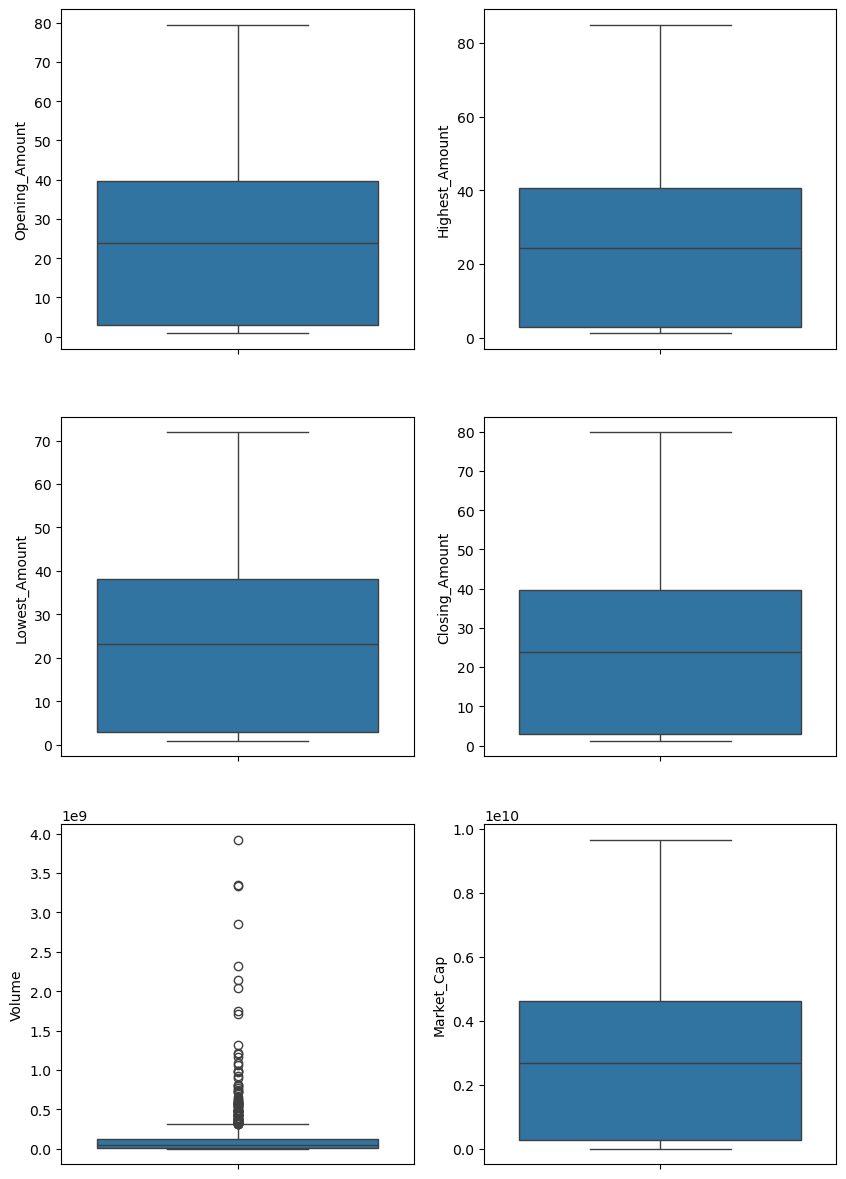

In [200]:
# Checking Outliers

fig,axis=plt.subplots(3,2,figsize=(10, 15))

sns.boxplot(ax = axis[0,0], data=data['Opening_Amount'])
sns.boxplot(ax = axis[0,1], data=data['Highest_Amount'])
sns.boxplot(ax = axis[1,0], data=data['Lowest_Amount'])
sns.boxplot(ax = axis[1,1], data=data['Closing_Amount'])
sns.boxplot(ax = axis[2,0], data=data['Volume'])
sns.boxplot(ax = axis[2,1], data=data['Market_Cap'])

In [202]:
# Removing extreme outliers from Volume column

def outlier(x):

    q1 = data[x].quantile(0.25)
    q3 = data[x].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    median = np.median(data[x])
    for i in data[x]:
        if i <lower or i>upper:
            data[x]=data[x].replace({i:median})

outlier('Volume')

<Axes: ylabel='Volume'>

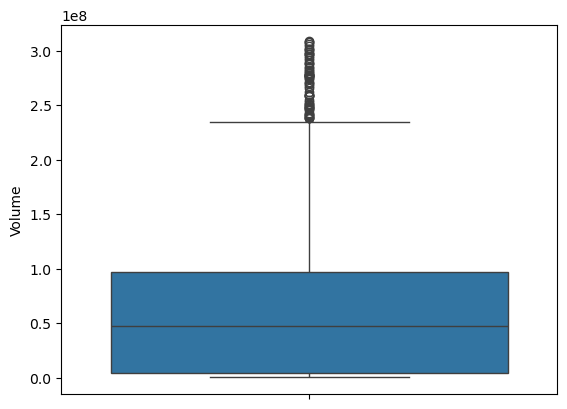

In [204]:
sns.boxplot(data['Volume'])

In [210]:
# Market_cap and volumne contains large value as compared to other columns, so they are standarized
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[["Market_Cap","Volume"]] = scaler.fit_transform(data[["Market_Cap","Volume"]])


In [211]:
data.head()

,Date,Opening_Amount,Highest_Amount,Lowest_Amount,Closing_Amount,Volume,Market_Cap
1,2022-11-11,3.52,3.68,2.47,2.59,-0.225397,-0.923006
2,2022-11-10,2.29,4.20,2.14,3.52,-0.225397,-0.872857
3,2022-11-09,5.52,6.25,2.06,2.30,-0.225397,-0.938691
4,2022-11-08,22.14,22.14,3.15,5.52,-0.225397,-0.764497
5,2022-11-07,22.26,23.15,21.92,22.14,-0.225397,0.135265


 #### Predict Future Prices


In [478]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

## Chechking if data is Stationary which means  constant mean & variance. It is important for Arima Model

result = adfuller(data['Closing_Amount'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("Data is non-stationary. Differencing is required.")
else:
    print("Data is stationary. Proceed with modeling.")


ADF Statistic: -1.361855185106875
p-value: 0.6004205394716368
Data is non-stationary. Differencing is required.


In [249]:
# we need to apply differencing (subtracting previous values).

data['Closing_Amount_Diff'] = data['Closing_Amount'].diff()

# Drop NaN values created by differencing
data.dropna(inplace=True)


from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['Closing_Amount_Diff'])

if adf_result[1] < 0.05:
    print("Data is now stationary")
else:
    print("Data is still non-stationary")


Data is now stationary


In [251]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(data['Closing_Amount'],order=(2,1,2))  # (p=2, d=1, q=2) as a starting point
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

print(forecast)


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1196    1.764840
1197    1.761252
1198    1.759069
1199    1.757824
1200    1.757140
1201    1.756773
1202    1.756579
1203    1.756477
1204    1.756424
1205    1.756397
1206    1.756383
1207    1.756376
1208    1.756372
1209    1.756370
1210    1.756369
1211    1.756369
1212    1.756368
1213    1.756368
1214    1.756368
1215    1.756368
1216    1.756368
1217    1.756368
1218    1.756368
1219    1.756368
1220    1.756368
1221    1.756368
1222    1.756368
1223    1.756368
1224    1.756368
1225    1.756368
Name: predicted_mean, dtype: float64


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [271]:
data = data.drop(columns=['Closing_Amount_Diff'])

### Detect Seasonal Trends:

In [253]:
# Apply Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Closing_Amount'], model='additive', period=30)  # Assume a 30-day cycle


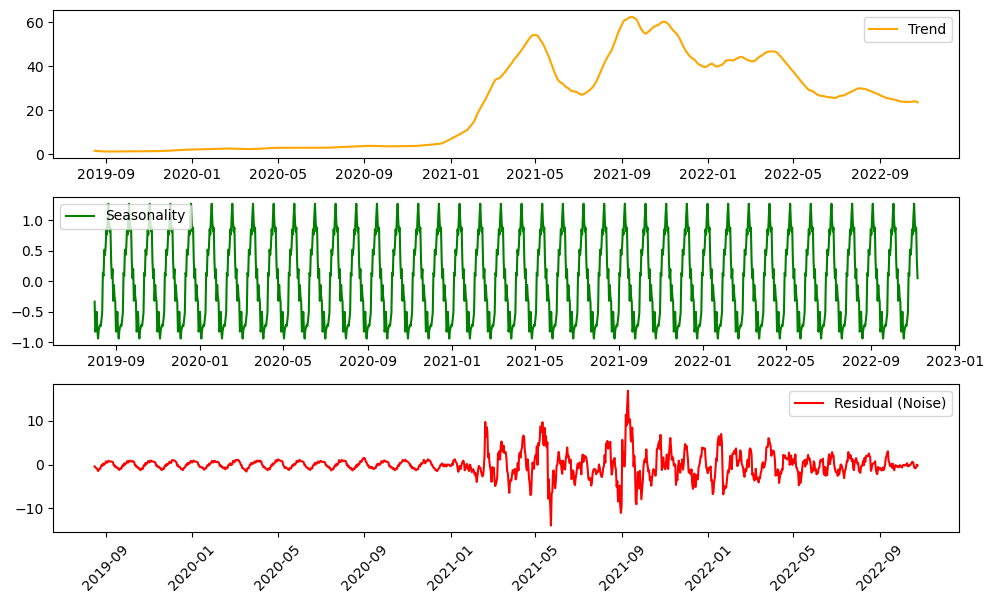

In [266]:
#Plot the Decomposed Components - Can check recurring patterns in stock prices

plt.figure(figsize=(10, 8))


plt.subplot(412)
plt.plot(data['Date'], decomposition.trend, label='Trend', color='orange')
plt.legend()

plt.subplot(413)
plt.plot(data['Date'], decomposition.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(414)
plt.plot(data['Date'], decomposition.resid, label='Residual (Noise)', color='red')
plt.legend()

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


### Moving Average Calculation

In [342]:
data = data.sort_values(by='Date')

# Calculate Moving Averages
data['7-day MA'] = data['Closing_Amount'].rolling(window=7).mean()
data['30-day MA'] = data['Closing_Amount'].rolling(window=30).mean()

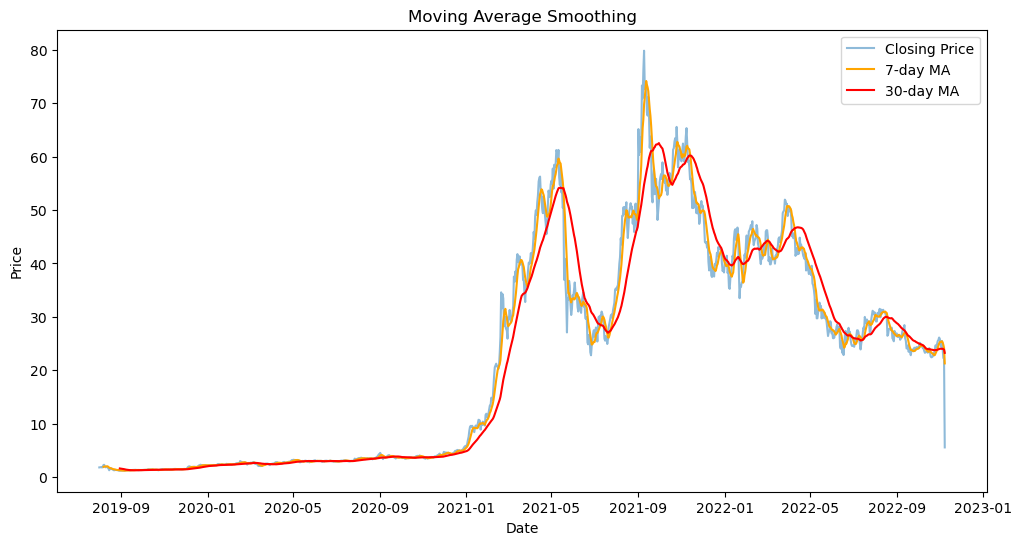

In [344]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Closing_Amount'], label='Closing Price', alpha=0.5)
plt.plot(data['Date'], data['7-day MA'], label='7-day MA', color='orange')
plt.plot(data['Date'], data['30-day MA'], label='30-day MA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()

### Stock Volatility Detection

In [329]:
import pandas as pd


# Creating  a new DataFrame 
volatility_data = data[['Date', 'Highest_Amount', 'Lowest_Amount']].copy()

# Calculating Fluctuation
volatility_data['Daily_Fluctuation'] = volatility_data['Highest_Amount'] - volatility_data['Lowest_Amount']

# Extracting Year-Month 
volatility_data['Year-Month'] = volatility_data['Date'].dt.to_period('M')

# Calculating Monthly Average Fluctuation
monthly_volatility = volatility_data.groupby('Year-Month')['Daily_Fluctuation'].mean().reset_index()


most_volatile = monthly_volatility.sort_values(by='Daily_Fluctuation', ascending=False)

print(most_volatile.head(5))  


   Year-Month  Daily_Fluctuation
25    2021-09           8.594667
21    2021-05           5.428387
24    2021-08           4.329677
20    2021-04           3.980667
26    2021-10           3.834839


### Trading Volume Trends

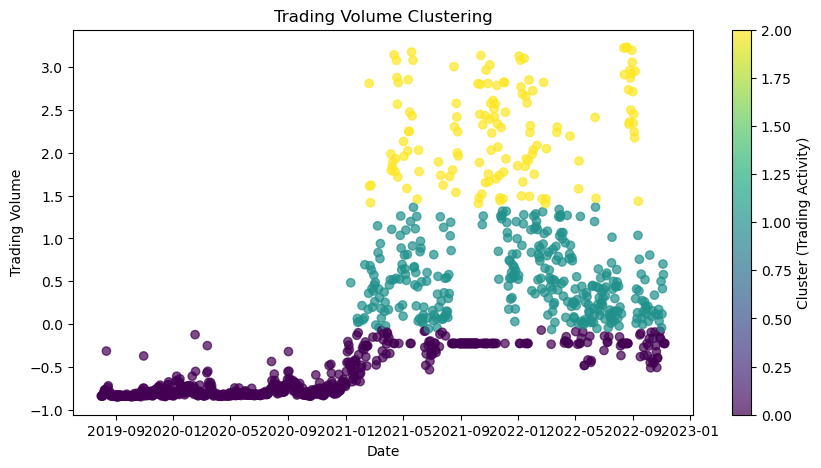

In [338]:
# Using K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select only the Volume column for clustering
volume_df = data[['Date', 'Volume']].copy()


# Applying K-Means clustering 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
volume_df['Cluster'] = kmeans.fit_predict(volume_df[['Volume']])

# Naming cluster to low,med,high
cluster_mapping = {0: "Low Activity", 1: "Medium Activity", 2: "High Activity"}
volume_df['Trading_Activity'] = volume_df['Cluster'].map(cluster_mapping)


plt.figure(figsize=(10, 5))
plt.scatter(volume_df['Date'], volume_df['Volume'], c=volume_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster (Trading Activity)")
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Trading Volume Clustering")
plt.show()




### Identify Price Anomalies:

In [359]:

# Sort data by Date
data = data.sort_values(by='Date')

# Create a new DataFrame 
anomaly_data = data[['Date', 'Closing_Amount']].copy()

# Calculating 30 day MA
anomaly_data['MA_30'] = data['Closing_Amount'].rolling(window=30).mean()

# Calculate 30 day Standard Deviation
anomaly_data['STD_30'] = data['Closing_Amount'].rolling(window=30).std()

#  When Closing Price deviates more than 2*STD from MA_30
anomaly_data['Anomaly'] = np.abs(anomaly_data['Closing_Amount'] - anomaly_data['MA_30']) > (2 * anomaly_data['STD_30'])


print(anomalies[['Date', 'Closing_Amount', 'MA_30', 'Anomaly']])


           Date  Closing_Amount      MA_30  Anomaly
1130 2019-10-09            1.43   1.288000     True
1128 2019-10-11            1.40   1.297333     True
1110 2019-10-29            1.46   1.341000     True
1093 2019-11-15            1.48   1.362000     True
1092 2019-11-16            1.48   1.366333     True
...         ...             ...        ...      ...
23   2022-10-20           22.41  23.839667     True
22   2022-10-21           22.45  23.828000     True
13   2022-10-30           25.65  23.888667     True
12   2022-10-31           26.11  23.949667     True
4    2022-11-08            5.52  23.242667     True

[174 rows x 4 columns]


### Model Building

#### Stock Price Prediction:

##### This question is same as Time-Series Analysis Question -Predict Future Prices: Use historical trends to build a model 
##### forecasting closing prices for the next 30 days
##### Not solving again as sol is stated above

#### Market Crash Prediction

In [393]:
# Threshold to check price drop
threshold = 0.05  # 5% 

data['Price_Change'] = data['Closing_Amount'].pct_change()  # % change from previous day
data['Crash'] = (data['Price_Change'] <= -threshold).astype(int)

# Drop NaN values after pct_change calculation
data.dropna(inplace=True)
data

,index,Date,Opening_Amount,Highest_Amount,Lowest_Amount,Closing_Amount,Volume,Market_Cap,7-day MA,30-day MA,Price_Change,Crash
2,1165,2019-09-04,1.2000,1.20,1.1400,1.18,-0.838995,-1.051204,1.170000,1.471333,-0.016667,0
3,1164,2019-09-05,1.1800,1.18,1.1400,1.15,-0.853200,-1.051476,1.170000,1.444667,-0.025424,0
4,1163,2019-09-06,1.1500,1.19,1.1300,1.15,-0.838363,-1.051547,1.170000,1.408667,0.000000,0
5,1162,2019-09-07,0.8313,1.21,0.8313,1.21,-0.825573,-1.050910,1.177143,1.374000,0.052174,0
6,1161,2019-09-08,1.2100,1.24,1.2000,1.24,-0.840961,-1.050564,1.187143,1.352667,0.024793,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1159,8,2022-11-04,24.3600,25.80,24.1500,25.47,0.701661,0.315523,25.417143,24.017667,0.045567,0
1160,7,2022-11-05,25.4700,25.81,23.9600,24.06,0.578042,0.239031,25.221429,24.003333,-0.055359,1
1161,6,2022-11-06,24.0600,24.83,21.7300,22.27,-0.225397,0.142142,24.738571,23.929000,-0.074397,1
1162,5,2022-11-07,22.2600,23.15,21.9200,22.14,-0.225397,0.135265,24.171429,23.862667,-0.005837,0


In [395]:
# Creating Model - Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier


X = data[['Opening_Amount', 'Highest_Amount', 'Lowest_Amount', 'Volume']]
y = data['Crash']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # Predicting Market Crash
y_pred


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [409]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report 

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("CLassification report:\n",classification_report(y_test, y_pred))

Accuracy: 0.9313304721030042
Confusion Matrix:
 [[215   3]
 [ 13   2]]
CLassification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       218
           1       0.40      0.13      0.20        15

    accuracy                           0.93       233
   macro avg       0.67      0.56      0.58       233
weighted avg       0.91      0.93      0.91       233



#### Feature Importance Analysis:

In [435]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Select features (X) and target (y)
X = data[['Opening_Amount', 'Highest_Amount', 'Lowest_Amount', 'Volume']]  # Existing columns
y = data['Closing_Amount']

# Train Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

feature_importance = tree_model.feature_importances_  #assign a score to input features based on their usefulness 

feature_importance

array([3.71417488e-04, 5.36496255e-02, 9.45746946e-01, 2.32010978e-04])

In [433]:
#Highest_amount and Lowest Amount are 2 main feature which is affectig stock price

#### Predict Trading Volume Spikes: 

In [440]:
#A volume spike occurs when the trading volume is significantly higher than usual.
#We can define it using Standard Deviation 

mean_vol = data['Volume'].mean()
std_vol = data['Volume'].std()

#  +2 standard deviations rule is used in statistics to capture significant deviations or spike
data['Volume_Spike'] = (data['Volume'] > mean_vol + 2 * std_vol).astype(int) 



In [444]:
# Predicting using Random Forest Classifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X = data[['Opening_Amount', 'Highest_Amount', 'Lowest_Amount', 'Closing_Amount']] 
y = data['Volume_Spike']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("CLassification report:\n",classification_report(y_test, y_pred))


Accuracy: 0.9313304721030042
Confusion Matrix:
 [[215   5]
 [ 11   2]]
CLassification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       220
           1       0.29      0.15      0.20        13

    accuracy                           0.93       233
   macro avg       0.62      0.57      0.58       233
weighted avg       0.91      0.93      0.92       233



#### Building model for Stock Price and Evaluating the best model

In [449]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [451]:

X = data[['Opening_Amount', 'Highest_Amount', 'Lowest_Amount', 'Volume']]
y = data['Closing_Amount']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [482]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}


results_data = pd.DataFrame(results)
print(results_data)


          Linear Regression  Decision Tree  Random Forest
MAE                0.370281       0.696481       0.490739
RMSE               0.638202       1.360814       0.940714
R2 Score           0.999071       0.995775       0.997981


In [469]:
#Hypertuning for decision tree

param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search_dt.fit(X_train, y_train)

print("Best Parameters ", grid_search_dt.best_params_)
print("Best R2 Score ", grid_search_dt.best_score_)


Best Parameters  {'max_depth': 10, 'min_samples_split': 5}
Best R2 Score  0.9944819240839122


In [471]:
# hypertuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

print("Best Parameters", grid_search_rf.best_params_)
print("Best R2 Score", grid_search_rf.best_score_)


Best Parameters {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best R2 Score 0.9966084366012495




#### Linear Regression performed the best in terms of R² score (0.999) also its MAE and RMSE are lowest
#### Random Forest (even before tuning) was better than Decision Tree in terms of accuracy.
#### Hyperparameter tuning improved both Decision Tree and Random Forest models 

#### Based on the highest R² Score and RMSE, Linear Regression is the best performing model.
#### However, Random Forest with tuning is a good alternative 